In [25]:
import numpy as np
import pandas as pd

import os
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
%matplotlib inline

mat = scipy.io.loadmat('../Data/cars_annos.mat')

from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model


class_labels = mat['class_names'][0]


def bringAnnot(fileName):
    if type(fileName) == str:
        numb = int(re.sub(r'[^0-9]', '', fileName))
    else:
        numb = int(fileName)
    
    print((mat['annotations'][0][numb-1]))    

def bringup_ClassLabel(fileName):
    if type(fileName) == str:
        numb = int(re.sub(r'[^0-9]', '', fileName))
    else:
        numb = int(fileName)
    
    #print("Class of image {}: {}".format(fileName, class_labels[int(mat['annotations'][0][numb-1][5])-1][0]))
    return class_labels[int(mat['annotations'][0][numb-1][5])-1][0]

def getPath(number):
    fileName  = str('0') * int(6 - len(str(number)))
    fileName += str(number)+".jpg"
    return ("../Data/car_ims/"+fileName)

def getImgArray(number):
    img_path =  getPath(number)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x = preprocess_input(x)
    return x

def showRandomNxN(N):
    '''
    Function to plot the MNIST data on a grid of NxN
    '''
    plt.rcParams['figure.figsize'] = [30, 30]
    
    listofRand = np.random.randint(1, 16185, size=int(N*N))
    
    image_size = (128, 128)
    
    fig = plt.figure()
    
    for i in range(0, N*N):
        fileName =  str('0')*int(6 - len(str(listofRand[i])))+str(listofRand[i])+".jpg"
        img = image.load_img("../Data/car_ims/"+fileName, target_size=image_size)
        ax = fig.add_subplot(N, N, i+1)
        imgplot = ax.imshow(img)
        ax.set_title(bringup_ClassLabel(fileName))
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show();

def features_Model(numb, model, saveFeatures="../Data/features/temp.csv"):
    """
    Created features (1000 dimensions) for images from 'model'
    gets the file path from func getPath
    
    Args: numb = [1, 2, 3 ... 16] + manually extract (16001 to 16185)
    Returns: Returns none, but saves the features at "saveFeatures" location
    
    """

    num_of_imgs = 16185
    feature_df = pd.DataFrame()
    
    for jpegImg in range(1, num_of_imgs + 1): #loop over image numbers: 1 to 16185
        img_path =  getPath(jpegImg)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        features = model.predict(x)
        feature_df = feature_df.append(pd.DataFrame(features), ignore_index=True)
        
        if jpegImg % 1000 ==0:
            print("Done upto image {}".format(jpegImg))
            feature_df.to_csv(saveFeatures)
            feature_df = pd.DataFrame()
    
    feature_df.to_csv(saveFeatures)
    
    
VGG19_model = VGG19(weights='imagenet', include_top=False)
x = getImgArray(16120)
x = preprocess_input(x)
features = VGG19_model.predict(x)


"""
for i in range(2, 5):
    saveVGG19 = "../Data/features/featuresVGG19"+"_"+str(i)+".csv"
    runVGG16_for_features = features_Model(i, VGG19_model, saveVGG19)
"""

'\nfor i in range(2, 5):\n    saveVGG19 = "../Data/features/featuresVGG19"+"_"+str(i)+".csv"\n    runVGG16_for_features = features_Model(i, VGG19_model, saveVGG19)\n'

In [29]:
VGG19_top = VGG19(weights='imagenet', include_top=True)
model = Model(inputs=VGG19_top.input, outputs=VGG19_top.get_layer('fc2').output)
fc2_features = model.predict(x)
print(fc2_features.shape)
print(fc2_features)

(1, 4096)
[[0.         0.         0.00594538 ... 0.         1.0397875  0.        ]]


In [30]:
model_2 = Model(inputs=VGG19_top.input, outputs=VGG19_top.layers[-2].output)
fc2_features_2 = model_2.predict(x)
print(fc2_features_2.shape)
print(fc2_features_2)

(1, 4096)
[[0.         0.         0.00594538 ... 0.         1.0397875  0.        ]]


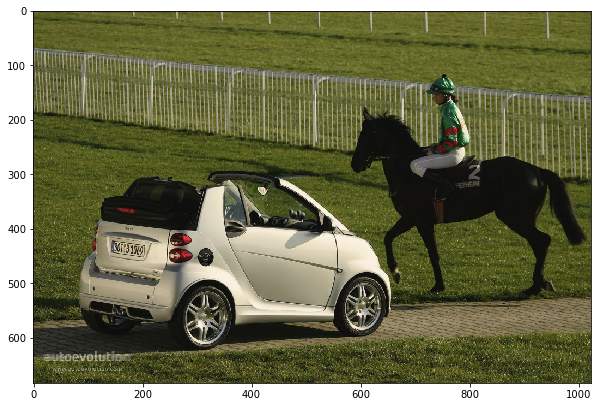

In [11]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(img)

In [12]:
bringAnnot(16120)

(array(['car_ims/016120.jpg'], dtype='<U18'), array([[78]], dtype=uint8), array([[289]], dtype=uint16), array([[669]], dtype=uint16), array([[633]], dtype=uint16), array([[196]], dtype=uint8), array([[0]], dtype=uint8))


In [15]:
print(x.shape)

(1, 683, 1024, 3)


In [12]:
VGG16_model = VGG16(weights='imagenet', include_top=True)

for i in range(14, 17):
    saveVGG16 = "../Data/features/featuresVGG16"+"_"+str(i)+".csv"
    runVGG16_for_features = features_Model(i, VGG16_model, saveVGG16)

Done upto image 13500
Done upto image 14000
Done upto image 14500
Done upto image 15000
Done upto image 15500
Done upto image 16000


In [32]:
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import preprocess_input as ppiRes

resent_model = ResNet50V2(weights='imagenet', include_top=True)
x = getImgArray(16120)
x = ppiRes(x)

model_res = Model(inputs=resent_model.input, outputs=resent_model.layers[-2].output)
fc2_features_res = model_res.predict(x)
print(fc2_features_res.shape)
print(fc2_features_res)


102875136/102869336 [==============================] - 88s 1us/step
(1, 2048)
[[0.41578686 0.13406396 0.         ... 0.08777552 0.         0.11134376]]
